In [2]:
import pandas as pd
DATA_URL = "ALL INDIA CONSUMER PRICE INDEX 2013-24 - datafile.csv.csv"

def load_data():
    df = pd.read_csv(DATA_URL)
    # Strip spaces and convert Month Names to Numbers
    df['Month'] = df['Month'].str.strip()  # Remove extra spaces
    df['Month'] = pd.to_datetime(df['Month'], format='%B', errors='coerce').dt.month

    # Check for any failed conversions
    if df['Month'].isna().any():
        print("Warning: Some months could not be converted. Check for typos.")

    # Create a proper datetime column
    df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

    # Set Date as Index
    df.set_index('Date', inplace=True)

    # Drop redundant columns
    df.drop(['Year', 'Month'], axis=1, inplace=True)

    # Sort by date
    df_rural = df[df["Sector"] == "Rural"]
    df_urban = df[df["Sector"] == "Urban"]
    df_rural_urban = df[df["Sector"] == "Rural+Urban"]
    return df_rural,df_urban,df_rural_urban

# data_load_state = st.text('Loading data...')
rural_data, urban_data, rural_urban_data = load_data()

In [3]:
rural_data


,Sector,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,...,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,Unnamed: 30
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,Rural,107.5,106.3,108.1,104.9,106.1,103.9,101.9,106.1,106.8,...,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1,178.538462
2013-02-01,Rural,109.2,108.7,110.2,105.4,106.7,104.0,102.4,105.9,105.7,...,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8,NaN
2013-03-01,Rural,110.2,108.8,109.9,105.6,106.2,105.7,101.4,105.7,105.0,...,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0,NaN
2013-04-01,Rural,110.2,109.5,106.9,106.3,105.7,108.3,103.4,105.7,104.2,...,106.5,106.1,105.1,104.4,104.5,104.8,102.7,104.6,106.4,NaN
2013-05-01,Rural,110.9,109.8,105.9,107.5,105.3,108.1,107.3,106.1,103.7,...,107.5,106.8,105.7,104.1,105.0,105.5,102.1,104.8,107.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,Rural,183.0,215.1,185.2,181.8,163.1,174.9,190.5,199.8,128.1,...,182.3,181.7,191.4,171.4,176.3,184.8,185.2,181.9,187.0,NaN
2023-11-01,Rural,184.8,210.9,190.4,182.2,162.6,174.6,199.9,202.9,129.7,...,182.4,182.0,191.9,171.7,176.4,185.2,186.7,182.5,188.2,NaN
2023-12-01,Rural,186.2,208.0,197.1,182.4,162.4,172.6,188.4,204.2,130.2,...,183.1,182.5,192.5,171.8,177.0,185.3,188.1,183.0,187.6,NaN


In [4]:
import requests

url = "https://api.mospi.gov.in/api/cpi/getCPIIndex"
params = {
    "Base_year": "2012",
    "Series": "Current_series",
    "Year": "2020,2021,2022,2023,2024,2025",
    "Month": "1,2,3,4,5,6,7,8,9,10,11,12",
    "State_code": ",".join(str(i) for i in range(1, 37)) + ",99",
    "Group_code": ",".join(str(i) for i in range(8)),
    "Subgroup_code": ",".join([
        "1.1.01","1.1.02","1.1.03","1.1.04","1.1.05","1.1.06","1.1.07","1.1.08","1.1.09",
        "1.1.10","1.1.12","1.2.11","1.99","2.99","3.1.01","3.1.02","3.99","4.99","5.99",
        "6.1.01","6.1.02","6.1.03","6.1.04","6.1.05","6.1.06","6.99","7.99","0.99"
    ]),
    "Sector": "1,2,3",
    "Format": "CSV"
}

headers = {"accept": "*/*"}

response = requests.get(url, params=params, headers=headers)

if response.status_code == 200:
    with open("cpi_data.csv", "w", encoding="utf-8") as file:
        file.write(response.text)
    print("Data saved as cpi_data.csv")
else:
    print(f"Failed to fetch data. Status Code: {response.status_code}, Response: {response.text}")

Data saved as cpi_data.csv


In [5]:
import requests
import csv

url = "https://api.mospi.gov.in/api/cpi/getCPIIndex"

subgroup_codes = [
    "1.1.01","1.1.02","1.1.03","1.1.04","1.1.05","1.1.06","1.1.07","1.1.08","1.1.09","1.1.10",
    "1.1.12","1.2.11","1.99","2.99","3.1.01","3.1.02","3.99","4.99","5.99",
    "6.1.01","6.1.02","6.1.03","6.1.04","6.1.05","6.1.06","6.99","7.99","0.99"
]

# Break subgroups into chunks of 20
def chunk_list(lst, size=20):
    for i in range(0, len(lst), size):
        yield lst[i:i + size]

headers = {"accept": "*/*"}
params_base = {
    "Base_year": "2012",
    "Series": "Current_series",
    "Year": "2020,2021,2022,2023,2024,2025",
    "Month": "1,2,3,4,5,6,7,8,9,10,11,12",
    "State_code": ",".join(str(i) for i in range(1, 37)) + ",99",
    "Group_code": ",".join(str(i) for i in range(8)),
    "Sector": "1,2,3",
    "Format": "CSV"
}

# Open CSV file to store results
with open("cpi_data.csv", "w", newline="", encoding="utf-8") as file:
    csv_writer = csv.writer(file)
    header_written = False

    # Fetch data in chunks
    for subgroup_chunk in chunk_list(subgroup_codes, size=20):
        params = params_base.copy()
        params["Subgroup_code"] = ",".join(subgroup_chunk)

        response = requests.get(url, params=params, headers=headers)

        if response.status_code == 200:
            rows = response.text.split("\n")

            # Write header only once
            if not header_written:
                csv_writer.writerow(rows[0].split(","))
                header_written = True

            # Write data
            for row in rows[1:]:
                if row.strip():
                    csv_writer.writerow(row.split(","))

            print(f"Fetched {len(rows) - 1} records for {subgroup_chunk}")

        else:
            print(f"Failed for {subgroup_chunk}: {response.status_code}, {response.text}")

print("Data collection complete: saved as cpi_data.csv")

Fetched 21 records for ['1.1.01', '1.1.02', '1.1.03', '1.1.04', '1.1.05', '1.1.06', '1.1.07', '1.1.08', '1.1.09', '1.1.10', '1.1.12', '1.2.11', '1.99', '2.99', '3.1.01', '3.1.02', '3.99', '4.99', '5.99', '6.1.01']
Fetched 21 records for ['6.1.02', '6.1.03', '6.1.04', '6.1.05', '6.1.06', '6.99', '7.99', '0.99']
Data collection complete: saved as cpi_data.csv


In [3]:
import json
parsed_json = json.loads("Response.json")

# # Extract 'data' key and convert to DataFrame
# df = pd.DataFrame(parsed_json["data"])



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [8]:
df


,data,msg,statusCode
0,"{'baseyear': '2010', 'year': 2011, 'month': 'A...",Data fetched successfully,True
1,"{'baseyear': '2010', 'year': 2011, 'month': 'A...",Data fetched successfully,True
2,"{'baseyear': '2010', 'year': 2011, 'month': 'A...",Data fetched successfully,True
3,"{'baseyear': '2010', 'year': 2011, 'month': 'A...",Data fetched successfully,True
4,"{'baseyear': '2010', 'year': 2011, 'month': 'A...",Data fetched successfully,True
...,...,...,...
336841,"{'baseyear': '2012', 'year': 2025, 'month': 'J...",Data fetched successfully,True
336842,"{'baseyear': '2012', 'year': 2025, 'month': 'J...",Data fetched successfully,True
336843,"{'baseyear': '2012', 'year': 2025, 'month': 'J...",Data fetched successfully,True
336844,"{'baseyear': '2012', 'year': 2025, 'month': 'J...",Data fetched successfully,True


In [6]:
parsed_json = json.loads("response.json")

# # Extract 'data' key and convert to DataFrame
# df = pd.DataFrame(parsed_json["data"])
# 
# # Convert numeric columns to proper data types
# df["index"] = pd.to_numeric(df["index"], errors="coerce")
# df["inflation"] = pd.to_numeric(df["inflation"], errors="coerce")
# 
# print(df)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [7]:
import pandas as pd
import json

# Load JSON file
file_path = "response.json"  # Replace with the actual file path

try:
    with open(file_path, "r", encoding="utf-8") as file:
        parsed_json = json.load(file)  # Load JSON content

    # Ensure 'data' key exists
    if "data" in parsed_json:
        df = pd.DataFrame(parsed_json["data"])

        # Convert numeric columns
        df["index"] = pd.to_numeric(df["index"], errors="coerce")
        df["inflation"] = pd.to_numeric(df["inflation"], errors="coerce")

        print(df)
    else:
        print("Error: 'data' key not found in JSON!")

except FileNotFoundError:
    print("Error: JSON file not found!")
except json.JSONDecodeError as e:
    print("Error decoding JSON:", e)

       baseyear  year    month        state    sector  \
0          2010  2011    April    All India     Urban   
1          2010  2011    April    All India  Combined   
2          2010  2011    April    All India     Rural   
3          2010  2011    April    All India     Rural   
4          2010  2011    April    All India     Rural   
...         ...   ...      ...          ...       ...   
336841     2012  2025  January  West Bengal     Urban   
336842     2012  2025  January  West Bengal     Urban   
336843     2012  2025  January  West Bengal     Urban   
336844     2012  2025  January  West Bengal     Urban   
336845     2012  2025  January  West Bengal     Urban   

                              group                     subgroup  index  \
0                           General                               104.5   
1                           General                               106.2   
2                           General                               107.5   
3       Food; B

In [8]:
df

,baseyear,year,month,state,sector,group,subgroup,index,inflation,status
0,2010,2011,April,All India,Urban,General,,104.5,NaN,F
1,2010,2011,April,All India,Combined,General,,106.2,NaN,F
2,2010,2011,April,All India,Rural,General,,107.5,NaN,F
3,2010,2011,April,All India,Rural,Food; Beverages and Tobacco,Non Alcoholic Beverages,109.3,NaN,F
4,2010,2011,April,All India,Rural,Food; Beverages and Tobacco,Sugar; Honey;etc,95.1,NaN,F
...,...,...,...,...,...,...,...,...,...,...
336841,2012,2025,January,West Bengal,Urban,Miscellaneous,Personal Care and Effects,213.5,10.62,P
336842,2012,2025,January,West Bengal,Urban,Miscellaneous,Education,183.2,3.50,P
336843,2012,2025,January,West Bengal,Urban,Miscellaneous,Recreation and Amusement,157.5,1.09,P
336844,2012,2025,January,West Bengal,Urban,Miscellaneous,Transport and Communication,176.0,2.09,P


In [9]:
df.to_csv("cpi_data_mospi.csv", index=False)

In [12]:
df.shape

(336846, 10)

In [11]:
df['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025])

In [13]:
# Drop rows where baseyear is "2010"
df = df[df["baseyear"] != "2010"]

# Reset index (optional)
df.reset_index(drop=True, inplace=True)


In [14]:
df.shape

(302715, 10)

In [15]:
df.head()

,baseyear,year,month,state,sector,group,subgroup,index,inflation,status
0,2012,2013,April,All India,Rural,General,,106.4,NaN,F
1,2012,2013,April,All India,Urban,General,,105.7,NaN,F
2,2012,2013,April,All India,Combined,General,,106.1,NaN,F
3,2012,2013,April,All India,Urban,Food and Beverages,Milk and Products,104.7,NaN,F
4,2012,2013,April,All India,Rural,Food and Beverages,Cereals and Products,110.2,NaN,F


In [17]:
# Print unique values for each column
print("Unique States:", df["state"].unique())
print("\nUnique Sectors:", df["sector"].unique())
print("\nUnique Groups:", df["group"].unique())
print("\nUnique Subgroups:", df["subgroup"].unique())

Unique States: ['All India' 'Andaman and Nicobar Islands' 'Andhra Pradesh'
 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli' 'Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttarakhand'
 'Uttar Pradesh' 'West Bengal']

Unique Sectors: ['Rural' 'Urban' 'Combined']

Unique Groups: ['General' 'Food and Beverages' 'Pan, Tobacco and Intoxicants'
 'Clothing and Footwear' 'Housing' 'Fuel and Light' 'Miscellaneous'
 'Consumer Food Price']

Unique Subgroups: ['' 'Milk and Products' 'Cereals and Products' 'Meat and Fish' 'Egg'
 'Oils and Fats' 'Fruits' 'Vegetables' 'Pulses and Products'
 'Sugar and Confectionery' 'Spices' 'Non-alcoholic Beverages'
 'Prepared Meals, Snacks, Sweets etc.' 'Footwear' 'Clothing

In [18]:
df.to_csv("cpi_data_mospi_base12.csv", index=False)

In [19]:
df.columns.unique()

Index(['baseyear', 'year', 'month', 'state', 'sector', 'group', 'subgroup',
       'index', 'inflation', 'status'],
      dtype='object')

In [20]:
df

,baseyear,year,month,state,sector,group,subgroup,index,inflation,status
0,2012,2013,April,All India,Rural,General,,106.4,NaN,F
1,2012,2013,April,All India,Urban,General,,105.7,NaN,F
2,2012,2013,April,All India,Combined,General,,106.1,NaN,F
3,2012,2013,April,All India,Urban,Food and Beverages,Milk and Products,104.7,NaN,F
4,2012,2013,April,All India,Rural,Food and Beverages,Cereals and Products,110.2,NaN,F
...,...,...,...,...,...,...,...,...,...,...
302710,2012,2025,January,West Bengal,Urban,Miscellaneous,Personal Care and Effects,213.5,10.62,P
302711,2012,2025,January,West Bengal,Urban,Miscellaneous,Education,183.2,3.50,P
302712,2012,2025,January,West Bengal,Urban,Miscellaneous,Recreation and Amusement,157.5,1.09,P
302713,2012,2025,January,West Bengal,Urban,Miscellaneous,Transport and Communication,176.0,2.09,P


In [21]:
data = (df['state'] == "All India") & (df["sector"] == "Rural") & (df["group"] == "Consumer Food Price")


In [23]:
df[data]

,baseyear,year,month,state,sector,group,subgroup,index,inflation,status
81,2012,2013,April,All India,Rural,Consumer Food Price,,106.9,NaN,F
2238,2012,2013,August,All India,Rural,Consumer Food Price,,115.3,NaN,F
4396,2012,2013,December,All India,Rural,Consumer Food Price,,119.1,NaN,F
6553,2012,2013,February,All India,Rural,Consumer Food Price,,106.2,NaN,F
8709,2012,2013,January,All India,Rural,Consumer Food Price,,105.3,NaN,F
...,...,...,...,...,...,...,...,...,...,...
292012,2012,2024,May,All India,Rural,Consumer Food Price,,190.2,8.62,F
294168,2012,2024,November,All India,Rural,Consumer Food Price,,207.4,9.10,F
296327,2012,2024,October,All India,Rural,Consumer Food Price,,208.2,10.69,F
298483,2012,2024,September,All India,Rural,Consumer Food Price,,203.0,9.08,F


In [24]:
data = (df['state'] == "All India") & (df["sector"] == "Rural") & (df["group"] == "Consumer Food Price")
rural_old_gi = df[data]['index'].values[-2]
rural_new_gi = df[data]['index'].values[-1]

In [25]:
print(rural_old_gi, rural_new_gi)

203.0 198.8


In [28]:
def old_new_extractor(state, sector):
    data = (df['state'] == state) & (df["sector"] == sector ) & (df["group"] == "General")
    old_gi = df[data]['index'].values[-2]
    new_gi = df[data]['index'].values[-1]
    return old_gi, new_gi

In [29]:
rural_old_gi, rural_new_gi = old_new_extractor("All India","Rural")
print(rural_old_gi, rural_new_gi)

196.7 196.0


In [ ]:
geojson_url = "https://raw.githubusercontent.com/whateversource/india-geojson/main/india_states.geojson"
geojson = gpd.read_file(geojson_url)

In [30]:
import geopandas as gpd

# Load the Shapefile
shapefile_path = "https://github.com/datameet/maps/blob/master/States/Admin2.shp"  # Change this to your actual path
gdf = gpd.read_file(shapefile_path)

# Convert to GeoJSON
geojson_path = "india_states.geojson"
gdf.to_file(geojson_path, driver="GeoJSON")

print(f"✅ GeoJSON saved at: {geojson_path}")

DataSourceError: '/vsicurl/https://github.com/datameet/maps/blob/master/States/Admin2.shp' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

In [34]:
import json

# Load GeoJSON file
with open("states_india.geojson", "r") as f:
    india_states = json.load(f)

# Extract state names
geojson_states = [feature["properties"]["st_nm"] for feature in india_states["features"]]

# Print the extracted state names
print("States in GeoJSON:", geojson_states)


States in GeoJSON: ['Telangana', 'Andaman and Nicobar Island', 'Andhra Pradesh', 'Arunanchal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Daman and Diu', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Chandigarh', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Odisha', 'Dadara and Nagar Havelli', 'Meghalaya', 'Mizoram', 'Nagaland', 'NCT of Delhi']


In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("all india general index 13-25 - Sheet1.csv")  # Replace with actual dataset file

time_steps = 5  # Define the number of past time steps to use for prediction

# Select the target columns (rural, urban, combined)
features = ['rural', 'urban', 'combined']
scalers = {}




In [9]:
df.head()

,date,rural,urban,combined
0,2013-01-01,105.1,104.0,104.6
1,2013-02-01,105.8,104.7,105.3
2,2013-03-01,106.0,105.0,105.5
3,2013-04-01,106.4,105.7,106.1
4,2013-05-01,107.2,106.6,106.9


Training model for rural sector...
Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 7.7797
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.0155
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.6109
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.6066
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0371
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.5966
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.5927
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.6005 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5134
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.2986
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9212
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7053
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6306
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4098
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/ste

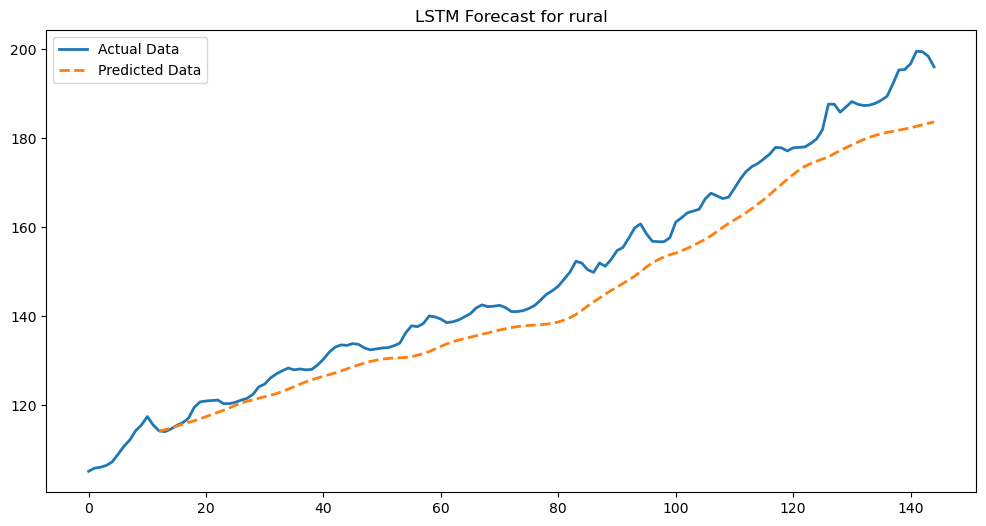

In [61]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load data
df = pd.read_csv("all india general index 13-25 - Sheet1.csv")  
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Select the sector dynamically
selected_sector = "rural"

# Extract data for training
data = df[selected_sector].values.reshape(-1, 1)

# Apply MinMax Scaling
scaler = MinMaxScaler(feature_range=(0, 5))
data_scaled = scaler.fit_transform(data)
joblib.dump(scaler, "scaler.pkl")

# Define function to create sequences
def prepare_data(series, time_steps):
    X, y = [], []
    for i in range(len(series) - time_steps):
        X.append(series[i:i + time_steps])
        y.append(series[i + time_steps])
    return np.array(X), np.array(y)

# Hyperparameters
time_steps = 12 # Increase time steps for better trend capture

# Prepare training data
X_train, y_train = prepare_data(data_scaled, time_steps)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build LSTM Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Attention, Add, LayerNormalization, Input
from tensorflow.keras import Model

def build_lstm_model():
    inputs = Input(shape=(time_steps, 1))
    
    # First LSTM Layer (Bidirectional for better trend capture)
    x = Bidirectional(LSTM(128, return_sequences=True, activation='tanh'))(inputs)
    x = Dropout(0.2)(x)

    # Second LSTM Layer
    x = LSTM(64, return_sequences=True, activation='tanh')(x)
    x = Dropout(0.2)(x)
    
    # Attention Layer (Helps focus on key time steps)
    attention = Dense(1, activation='sigmoid')(x)
    attention = Add()([x, attention])
    attention = LayerNormalization()(attention)

    # Third LSTM Layer
    x = LSTM(32, return_sequences=False, activation='tanh')(attention)
    x = Dropout(0.2)(x)

    # Fully Connected Layers
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')

    return model

# Train the model
model = build_lstm_model()
print(f"Training model for {selected_sector} sector...")
model.fit(X_train, y_train, epochs=200, batch_size=128, verbose=1)

# Make Predictions
predictions_scaled = model.predict(X_train)

# Inverse transform predictions back to original scale
predictions = scaler.inverse_transform(predictions_scaled)

# Plot actual vs. predicted data
plt.figure(figsize=(12, 6))
plt.plot(df[selected_sector].values, label="Actual Data", linewidth=2)
plt.plot(range(time_steps, time_steps + len(predictions)), predictions, label="Predicted Data", linestyle='dashed', linewidth=2)
plt.title(f"LSTM Forecast for {selected_sector}")
plt.legend()
plt.show()

In [58]:
model.save("lstm_rural_model.keras")
print("Model saved successfully in Keras format!")

Model saved successfully in Keras format!


Model loaded successfully!
[177.9 178.  178.8 179.8 181.9 187.6 187.6 185.8 187.  188.2 187.6 187.3
 187.4 187.8 188.5 189.4 192.2 195.3 195.4 196.7 199.5 199.4 198.4 196. ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


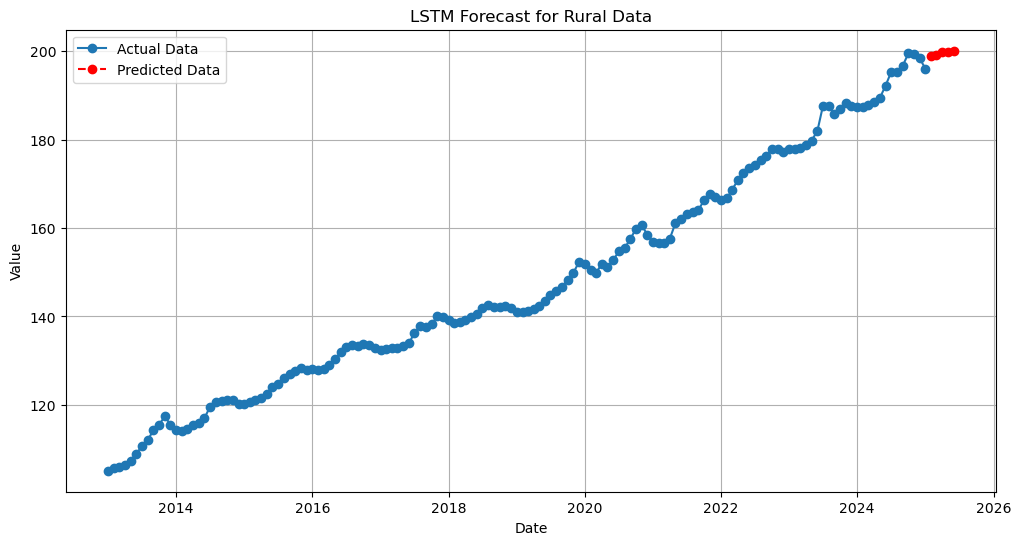

Predictions for the next 5 months:
              predicted
date                  
2025-02-01  199.001404
2025-03-01  199.046066
2025-04-01  199.757950
2025-05-01  199.926163
2025-06-01  200.113617


In [60]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved model
model = load_model("lstm_rural_model.keras")
print("Model loaded successfully!")

# Get the last `time_steps` values for prediction
last_sequence = df['rural'].values[-time_steps:]  # Extract last sequence from actual data
print(last_sequence)
# Reshape for LSTM input
last_sequence = last_sequence.reshape(1, time_steps, 1)

future_predictions = []
for _ in range(5):  # Predicting the next 5 months
    next_pred = model.predict(last_sequence)  # Get next prediction
    future_predictions.append(next_pred[0, 0])  # Store prediction

    # Update last_sequence: Shift left and append new prediction
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1, 0] = next_pred  # Assign new prediction

# Convert predictions to array
predictions = np.array(future_predictions).reshape(-1, 1)

# Inverse transform predictions to original scale
original_scale_predictions = scaler.inverse_transform(predictions).flatten()

# Create a DataFrame for predictions
last_date = df.index[-1]  # Get the last date from the original dataset
future_dates = pd.date_range(start=last_date, periods=6, freq='MS')[1:]  # Generate next 5 months

df_predictions = pd.DataFrame({'date': future_dates, 'predicted': original_scale_predictions})
df_predictions.set_index('date', inplace=True)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rural'], label="Actual Data", marker='o', linestyle='-')
plt.plot(df_predictions.index, df_predictions['predicted'], label="Predicted Data", marker='o', linestyle='--', color='red')

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("LSTM Forecast for Rural Data")
plt.legend()
plt.grid()
plt.show()

# Print the predicted values
print("Predictions for the next 5 months:\n", df_predictions)

Model loaded successfully!
Scaler loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


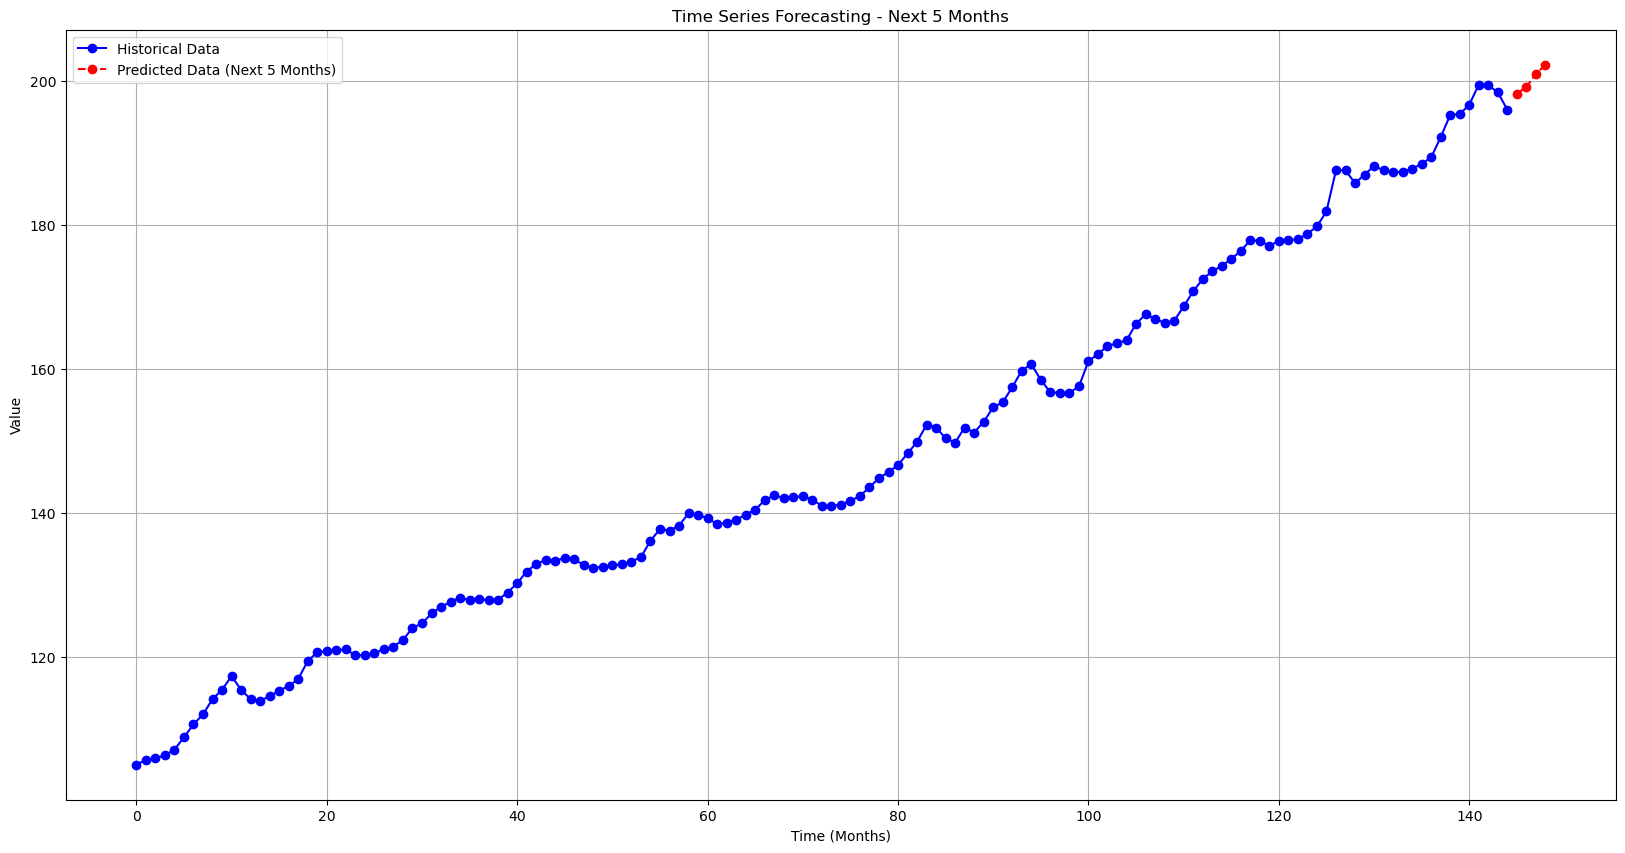

In [71]:
import numpy as np
import tensorflow as tf
import joblib
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("lstm_rural_model.keras")
print("Model loaded successfully!")

# Load the scaler
scaler = joblib.load("scaler.pkl")
print("Scaler loaded successfully!")

# Define the function to generate future predictions
def predict_future(model, data, scaler, window_size=4, steps=5):
    """Predicts the next `steps` months based on the last `window_size` data points."""
    
    # Scale the data
    scaled_data = scaler.transform(data.reshape(-1, 1))
    
    # Get the last 'window_size' values to start prediction
    last_window = scaled_data[-window_size:].flatten()
    predictions = []

    for _ in range(steps):
        # Reshape for model input
        input_seq = last_window.reshape(1, -1)
        
        # Predict the next value
        pred_scaled = model.predict(input_seq)[0][0]
        
        # Inverse transform to original scale
        pred_original = scaler.inverse_transform(np.array([[pred_scaled]]))[0][0]
        predictions.append(pred_original)
        
        # Update the last_window for the next step
        last_window = np.append(last_window[1:], pred_scaled)

    return np.array(predictions)

# Example data (last known time series data)
data = np.array(
    [105.1, 105.8, 106, 106.4, 107.2, 108.9, 110.7, 112.1, 114.2, 115.5, 117.4, 115.5, 114.2, 114, 114.6,
     115.4, 116, 117, 119.5, 120.7, 120.9, 121, 121.1, 120.3, 120.3, 120.6, 121.1, 121.5, 122.4, 124.1,
     124.7, 126.1, 127, 127.7, 128.3, 127.9, 128.1, 127.9, 128, 129, 130.3, 131.9, 133, 133.5, 133.4,
     133.8, 133.6, 132.8, 132.4, 132.6, 132.8, 132.9, 133.3, 133.9, 136.2, 137.8, 137.6, 138.3, 140,
     139.8, 139.3, 138.5, 138.7, 139.1, 139.8, 140.5, 141.8, 142.5, 142.1, 142.2, 142.4, 141.9, 141, 141,
     141.2, 141.7, 142.4, 143.6, 144.9, 145.7, 146.7, 148.3, 149.9, 152.3, 151.9, 150.4, 149.8, 151.9,
     151.2, 152.7, 154.7, 155.4, 157.5, 159.8, 160.7, 158.5, 156.8, 156.7, 156.7, 157.6, 161.1, 162.1,
     163.2, 163.6, 164, 166.3, 167.6, 167, 166.4, 166.7, 168.7, 170.8, 172.5, 173.6, 174.3, 175.3, 176.4,
     177.9, 177.8, 177.1, 177.8, 177.9, 178, 178.8, 179.8, 181.9, 187.6, 187.6, 185.8, 187, 188.2, 187.6,
     187.3, 187.4, 187.8, 188.5, 189.4, 192.2, 195.3, 195.4, 196.7, 199.5, 199.4, 198.4, 196])

# Predict next 5 months
future_predictions = predict_future(model, data, scaler, window_size=4, steps=4)

# Create time series for plotting
original_time = np.arange(len(data))
future_time = np.arange(len(data), len(data) + len(future_predictions))

# Plot the original data and predictions
plt.figure(figsize=(20, 10))
plt.plot(original_time, data, label="Historical Data", marker="o", color="blue", linestyle="-")
plt.plot(future_time, future_predictions, label="Predicted Data (Next 5 Months)", marker="o", color="red", linestyle="--")

# # Annotate the predicted points
# for i, txt in enumerate(future_predictions):
#     plt.annotate(f"{txt:.1f}", (future_time[i], future_predictions[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel("Time (Months)")
plt.ylabel("Value")
plt.title("Time Series Forecasting - Next 5 Months")
plt.legend()
plt.grid(True)
plt.show()

In [68]:
df = pd.read_csv("experiment_results.csv")
print(df.head(20))

    Seed   Train MSE  Train RMSE  Train MAE  Train R2    Test MSE  Test RMSE  \
0      0   14.839444    3.852200   3.003240  0.949982    9.047557   3.007916   
1      1   19.347918    4.398627   3.429268  0.934786   10.483066   3.237756   
2      2   14.433038    3.799084   2.909340  0.951352   20.894329   4.571031   
3      3   20.741489    4.554283   3.621599  0.930089  207.062399  14.389663   
4      4    8.407128    2.899505   2.221866  0.971663    6.248881   2.499776   
5      5  287.933078   16.968591  12.537927  0.029493   14.074448   3.751593   
6      6   18.166935    4.262269   3.243206  0.938767  302.036805  17.379206   
7      7   13.965064    3.736986   2.820349  0.952929  195.687634  13.988840   
8      8   18.467824    4.297421   3.502095  0.937752   27.852322   5.277530   
9      9   17.409707    4.172494   3.403046  0.941319   78.768416   8.875157   
10    10    6.438821    2.537483   2.055186  0.978297   14.869513   3.856101   
11    11  129.095534   11.362022   8.232